<a href="https://colab.research.google.com/github/RomeroCruzJuanPablo/RomeroCruz-JuanPablo/blob/main/CodingTasks/CodingTask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals for DCBP, S. Haug, University of Bern 

# Coding Task 1

- Deadline (upload to Ilias): 2022-03-22 17:00
- Estimated effort: 2-5 hours (if you don't progress after 2 hours of trying, search for help, ChatGPT, Google, colleagues, course tutor)
- Data on Ilias: CCD-Data with metadata file CCD-Metadata


## Tasks (maximum 12.5 points)

- **CT-1.1** Write a method (function) which removes the header information in the 
datafile and saves that information into a separate textfile. [0.5 points] 
- **CT-1.2** Write a function which reduces the data resolution by merging/averaging columns such that there is only one column per 1 nm. [2.0 points]  
- **CT-1.3** Now generalize the above merging so that it works for any number nm er column. [2.0 points]
- **CT-1.4** Implement the saving of the reduced dataset to a file. Do this (1) by writing an explicit loop (write line by line) and (2) by using pandas methods. Measure the running times of the two approaches. [2.0 points]
- **CT-1.5** Write a function which takes two wavelengths as input and plots the difference of the data at these lengths over time. [2.0 points] 
- **CT-1.6** Let the x-axis be in seconds, label the axes with names and units, label the plot with color and legend, make a title for the plot. Save the plot to a file. [2.0 points]
- **CT-1.7** Plot the full and some reduced datasets in the same figure. Is there any visual difference? [2.0 points]

In [148]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/ColabNotebooks/DSfCB/CCD-Data.txt'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [175]:
df=pd.read_csv(path,skiprows=13, delimiter='\t')
df#.head()


,Unnamed: 0,Unnamed: 1,316.6137,316.7492,316.8847,317.0203,317.1558,317.2913,317.4268,317.5623,...,778.9703,779.089,779.2076,779.3263,779.4449,779.5636,779.6822,779.8008,779.9194,780.0381
0,2018-10-25 10:32:04.789000,1540456324789,0.329672,0.329672,0.329672,0.090294,-0.716926,-1.829304,-0.686330,-0.428776,...,-0.038483,-0.039623,-0.036920,-0.037309,-0.037299,-0.037476,-0.036856,-0.036853,-0.039100,-0.035545
1,2018-10-25 10:32:04.878000,1540456324878,-0.044412,-0.044412,-0.044412,0.157632,-0.672423,-2.183981,-0.492421,-0.000000,...,-0.039428,-0.038486,-0.037309,-0.036357,-0.037289,-0.038728,-0.037214,-0.036902,-0.040210,-0.038165
2,2018-10-25 10:32:04.962000,1540456324962,0.338219,0.338219,0.338219,0.330993,-0.879836,-0.000000,-0.559845,-0.000000,...,-0.037725,-0.037534,-0.036560,-0.036152,-0.036554,-0.036875,-0.037351,-0.036746,-0.038686,-0.036903
3,2018-10-25 10:32:05.046000,1540456325046,-0.049682,-0.049682,-0.049682,0.519086,-0.681150,-0.000000,-0.417230,-0.000000,...,-0.037613,-0.037168,-0.036369,-0.034549,-0.036252,-0.037948,-0.036713,-0.035706,-0.038203,-0.036822
4,2018-10-25 10:32:05.129000,1540456325129,0.335086,0.335086,0.335086,-0.041393,-0.000000,-1.802774,-0.510417,-0.000000,...,-0.040919,-0.038288,-0.035840,-0.035638,-0.039504,-0.040093,-0.039953,-0.037656,-0.038082,-0.035900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,2018-10-25 10:32:34.404000,1540456354404,-0.048929,-0.048929,-0.048929,-0.052674,-0.739370,-2.155336,-0.520450,-0.000000,...,-0.038112,-0.036615,-0.035938,-0.034245,-0.035340,-0.037055,-0.035771,-0.036557,-0.037451,-0.033582
351,2018-10-25 10:32:34.488000,1540456354488,0.851907,0.851907,0.851907,-0.111298,-0.639166,-2.039414,-0.531784,-0.000000,...,-0.036887,-0.036921,-0.035249,-0.033394,-0.035231,-0.035815,-0.037457,-0.035020,-0.038338,-0.035408
352,2018-10-25 10:32:34.576000,1540456354576,0.329255,0.329255,0.329255,0.064351,0.316582,-2.107210,-0.298427,0.570461,...,-0.037311,-0.036231,-0.037977,-0.033525,-0.035225,-0.036255,-0.036670,-0.036079,-0.038006,-0.035039
353,2018-10-25 10:32:34.660000,1540456354660,0.330061,0.330061,0.330061,0.081473,-0.525273,-1.750123,-0.134352,0.243550,...,-0.036267,-0.036341,-0.037307,-0.035010,-0.036073,-0.036282,-0.036911,-0.036554,-0.037560,-0.034496


#**CT-1.1**
Write a method (function) which removes the header information in the datafile and saves that information into a separate textfile.

In [71]:
def head_info(url):
  #reads only the header
  with open(url,'r') as file:
    h=file.readlines()[0:13]
  #write a new file with it
  with open('Header.txt','w') as header:
    for i in h:
      header.write(i)

In [72]:
head_info(path)

In [73]:
with open('Header.txt','r') as a:
  m=a.readlines()
for i in m:
  print(i)

Data from 4ms_10 av_15 s_Absorbance_10-32-04-868.txt Node



Date: Thu Oct 25 10:32:04 CEST 2018

User: Christoph

Spectrometer: BALLMOOS

Trigger mode: 4

Integration Time (sec): 4.000000E-3

Scans to average: 10

Electric dark correction enabled: true

Nonlinearity correction enabled: false

Boxcar width: 0

XAxis mode: Wavelengths

Number of Pixels in Spectrum: 3648



# **CT-1.2** 
Write a function which reduces the data resolution by merging/averaging columns such that there is only one column per 1 nm. [2.0 points]  


In [74]:
def reduce_resolution_1(data):

    #create a new data frame 
    reduced_df = pd.DataFrame()  
   #keep track of the columns that can be averaged together
    to_ave=[]
    
    for nm in data.columns: 
    #avoid averaging columns that are not a wavelength but still add them to the dataframe
      try:
        float(nm)
      except: 
        reduced_df=pd.concat([reduced_df,data[nm]],axis=1)
        continue
     #avoid repeating the process for values that have already been averaged
      if nm in to_ave:
        continue
      else:
        to_ave=[]
      #compared value by value to average starting from the last analysed value
      for o_nm in data.columns[data.columns.get_loc(nm):]:  #identify columns that are within a 1 nm range
        if float(nm)-1 <float(o_nm)< float(nm)+1:
          to_ave.append(o_nm) 
        else: #once all plausible columns are identified, average them and add them to the new data frame
          #make the average
          selected_columns=data[to_ave]
          avg = selected_columns.mean(axis=1)
          #make the average name of the column
          col_name=np.mean(np.array([float(num) for num in to_ave]))
          #create the new column of the data frame
          new_column=pd.DataFrame({f"{col_name:.4f}":avg})
          #add it to the data frame
          reduced_df=pd.concat([reduced_df,new_column],axis=1)
          break
   
    return reduced_df

In [75]:
rdf=reduce_resolution_1(df)
rdf.head()

,Unnamed: 0,Unnamed: 1,317.0880,318.1719,319.2555,320.3388,321.4219,322.5046,323.5870,324.6692,...,768.9867,770.0579,771.1288,772.1993,773.2694,774.3391,775.4085,776.4775,777.5461,778.6143
0,2018-10-25 10:32:04.789000,1540456324789,-0.322753,0.201181,0.138077,0.123705,-0.218602,0.271327,-0.081507,-0.073678,...,-0.040109,-0.038833,-0.038909,-0.038311,-0.038781,-0.038620,-0.036741,-0.038835,-0.038263,-0.038378
1,2018-10-25 10:32:04.878000,1540456324878,-0.415554,-0.100080,1.805020,-0.448473,-0.022817,0.322955,1.552019,-0.104095,...,-0.040903,-0.038452,-0.038546,-0.038299,-0.038373,-0.038300,-0.037025,-0.039010,-0.038262,-0.038078
2,2018-10-25 10:32:04.962000,1540456324962,-0.011754,0.025572,0.066480,-0.247154,0.098938,0.121011,-0.182441,-0.277077,...,-0.040063,-0.038546,-0.038775,-0.038173,-0.038815,-0.038536,-0.036996,-0.038245,-0.037960,-0.037204
3,2018-10-25 10:32:05.046000,1540456325046,-0.091042,0.093096,-0.007817,0.000859,-0.011965,0.307321,0.139590,-0.054118,...,-0.039758,-0.037613,-0.038004,-0.037810,-0.038651,-0.038087,-0.036950,-0.038177,-0.037226,-0.037031
4,2018-10-25 10:32:05.129000,1540456325129,-0.168666,0.077360,-0.046431,-0.036755,0.036837,0.304675,-0.214330,-0.002881,...,-0.040419,-0.038644,-0.038671,-0.038418,-0.038561,-0.038312,-0.037127,-0.038540,-0.038229,-0.037476


#**CT-1.3** 
Now generalize the above merging so that it works for any number nm er column. [2.0 points]

In [76]:
def reduce_resolution_g(data,range=1):
    if range==0:
      return data
    #create a new data frame 
    reduced_df = pd.DataFrame()  
   #keep track of the columns that can be averaged together
    to_ave=[]
    
    for nm in data.columns: 
    #avoid averaging columns that are not a wavelength but still add them to the dataframe
      try:
        float(nm)
      except: 
        reduced_df=pd.concat([reduced_df,data[nm]],axis=1)
        continue
     #avoid repeating the process for values that have already been averaged
      if nm in to_ave:
        continue
      else:
        to_ave=[]
      #compared value by value to average starting from the last analysed value
      for o_nm in data.columns[data.columns.get_loc(nm):]:  #identify columns that are within a 1 nm range
        if float(nm)-range <float(o_nm)< float(nm)+range:
          to_ave.append(o_nm) 
        else: #once all plausible columns are identified, average them and add them to the new data frame
          #make the average
          selected_columns=data[to_ave]
          avg = selected_columns.mean(axis=1)
          #make the average name of the column
          col_name=np.mean(np.array([float(num) for num in to_ave]))
          #create the new column of the data frame
          new_column=pd.DataFrame({f"{col_name:.4f}":avg})
          #add it to the data frame
          reduced_df=pd.concat([reduced_df,new_column],axis=1)
          break
   
    return reduced_df

In [77]:
rdf=reduce_resolution_g(df,3)
rdf.head()

,Unnamed: 0,Unnamed: 1,318.1041,321.2187,324.3309,327.4407,330.5480,333.6528,336.7552,339.8551,...,749.8197,752.9328,756.0426,759.1494,762.2530,765.3535,768.4508,771.5450,774.6361,777.7240
0,2018-10-25 10:32:04.789000,1540456324789,-0.005973,0.044884,-0.046928,0.022967,0.074745,0.048599,-0.051124,0.108889,...,-0.040048,-0.040213,-0.040171,-0.040261,-0.040697,-0.040144,-0.039358,-0.038340,-0.038324,-0.038333
1,2018-10-25 10:32:04.878000,1540456324878,0.454136,-0.076481,0.483063,-0.029607,0.030512,0.026865,0.115290,0.257833,...,-0.040398,-0.040629,-0.040576,-0.040470,-0.040551,-0.040533,-0.039750,-0.038158,-0.038177,-0.038266
2,2018-10-25 10:32:04.962000,1540456324962,0.027930,-0.020738,-0.177654,0.042374,0.079597,0.109183,-0.052180,0.239741,...,-0.039781,-0.040802,-0.040617,-0.040695,-0.041194,-0.040514,-0.039360,-0.038242,-0.038222,-0.037745
3,2018-10-25 10:32:05.046000,1540456325046,-0.002005,0.077436,0.087577,0.035328,-0.054780,0.148285,-0.043795,0.107540,...,-0.039486,-0.039928,-0.039856,-0.039686,-0.040213,-0.039631,-0.038644,-0.037697,-0.038107,-0.037254
4,2018-10-25 10:32:05.129000,1540456325129,-0.047908,0.105963,-0.028745,0.024239,0.027190,0.108870,0.232798,0.182965,...,-0.039652,-0.040316,-0.040494,-0.040055,-0.040537,-0.039821,-0.039437,-0.038401,-0.038149,-0.037887


#**CT-1.4** 
Implement the saving of the reduced dataset to a file. Do this (1) by writing an explicit loop (write line by line) and (2) by using pandas methods. Measure the running times of the two approaches. [2.0 points]

In [78]:
import csv

In [79]:
#line by line
def linebyline(dataf):
  with open('red_df.csv', mode='w', newline='') as csv_file:
    # Create a writer object
    writer = csv.writer(csv_file)
    # Write the header row
    writer.writerow(dataf.columns)
    # Iterate over each row of the DataFrame and write it to the CSV file
    for index, row in dataf.iterrows():
        writer.writerow(row)

In [80]:
def pandmethod(dataf):
  dataf.to_csv('my_file.csv', index=False)

In [81]:
%%time
linebyline(rdf)


CPU times: user 167 ms, sys: 3.96 ms, total: 171 ms
Wall time: 196 ms


In [82]:
%%time
pandmethod(rdf)

CPU times: user 91.4 ms, sys: 7.85 ms, total: 99.3 ms
Wall time: 97.7 ms


#**CT-1.5** 
Write a function which takes two wavelengths as input and plots the difference of the data at these lengths over time. [2.0 points] 

In [196]:
def plottime_c5(dataf, w1,w2):
  columns_str = dataf.columns.tolist()
  columns_wl=[]
  graph=pd.DataFrame()
  for num in columns_str:
    try:
      num=float(num)
      columns_wl.append(num)
    except: 
      graph=pd.concat([graph,dataf[num]],axis=1)
      continue
  columns_wl.append(w1)
  columns_wl.append(w2)
  columns_wl.sort()
  
  #Define which is the smallest of both
  '''
  For each case we obtain
  -position in list
  -next number
  -number before
  -difference between each upper and downer limit
  -the smallest difference
  -biggest difference
  '''
  prim=min(w1,w2)
  prim_index=columns_wl.index(prim)
  lim_u_p=columns_wl[prim_index+1]
  lim_d_p=columns_wl[prim_index-1]
  dif_u_p=lim_u_p-prim
  dif_d_p=prim-lim_d_p
  dif_min_p=min(dif_u_p,dif_d_p)
  dif_max_p=max(dif_u_p,dif_d_p)

  seg=max(w1,w2)
  seg_index=columns_wl.index(seg)
  lim_u_s=columns_wl[seg_index+1]
  lim_d_s=columns_wl[seg_index-1]
  dif_u_s=lim_u_s-seg
  dif_d_s=seg-lim_d_s
  dif_min_s=min(dif_u_s,dif_d_s)
  dif_max_s=max(dif_u_s,dif_d_s)

  #in case the 2 wavelegnths one next to the other
  if prim_index+1 == seg_index:
    c1=columns_wl[prim_index-1]
    c2=columns_wl[seg_index+1]
  #in case both number could be assigned to the same number
  elif prim_index+2 == seg_index and dif_min_p ==dif_u_p and dif_min_s==dif_d_s:
    if dif_max_s>dif_max_p:
      c1=columns_wl[prim_index-1]
      c2=columns_wl[seg_index-1]
    elif dif_max_p>dif_max_s:
      c1=columns_wl[prim_index+1]
      c2=columns_wl[seg_index+1]
  #any other case we will choose the closest one even if it is the same as we are looking through the difference with the limits
  else:
    if dif_min_p==lim_d_p:
      c1=columns_wl[prim_index-1]
    else:
      c1=columns_wl[prim_index+1]
    
    if dif_min_s==lim_d_s:
      c2=columns_wl[seg_index-1]
    else:
      c2=columns_wl[seg_index+1]
  cs=[str(c1),str(c2)]
  graph=pd.concat([graph,dataf[cs]],axis=1)
  graph['Dif'] = (graph[cs[0]] - graph[cs[1]]).abs()
  
  graph = graph.rename(columns={'Unnamed: 0': 'Time','Unnamed: 1': 'ID'})
  
  graph.plot('Time','Dif')

  return plt.show()

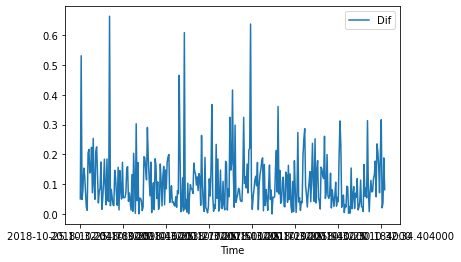

In [197]:
plottime_c5(rdf,316,320)


#**CT-1.6** 
Let the x-axis be in seconds, label the axes with names and units, label the plot with color and legend, make a title for the plot. Save the plot to a file. [2.0 points]

In [198]:
def plottime_c6(dataf, w1,w2):
  columns_str = dataf.columns.tolist()
  columns_wl=[]
  graph=pd.DataFrame()
  for num in columns_str:
    try:
      num=float(num)
      columns_wl.append(num)
    except: 
      graph=pd.concat([graph,dataf[num]],axis=1)
      continue
  columns_wl.append(w1)
  columns_wl.append(w2)
  columns_wl.sort()
  
  #Definimos cual de los dos es el menor y el mayor
  '''
  Para cada caso obtenmos
  -la posición en la lista
  -el número siguiente
  -el número anterior
  -la diferencia entre ambos límites
  -determinamos cual es la menor diferencia
  -determinamos la diferencia mayor
  '''
  prim=min(w1,w2)
  prim_index=columns_wl.index(prim)
  lim_u_p=columns_wl[prim_index+1]
  lim_d_p=columns_wl[prim_index-1]
  dif_u_p=lim_u_p-prim
  dif_d_p=prim-lim_d_p
  dif_min_p=min(dif_u_p,dif_d_p)
  dif_max_p=max(dif_u_p,dif_d_p)

  seg=max(w1,w2)
  seg_index=columns_wl.index(seg)
  lim_u_s=columns_wl[seg_index+1]
  lim_d_s=columns_wl[seg_index-1]
  dif_u_s=lim_u_s-seg
  dif_d_s=seg-lim_d_s
  dif_min_s=min(dif_u_s,dif_d_s)
  dif_max_s=max(dif_u_s,dif_d_s)

  #in case the 2 wavelegnths one next to the other
  if prim_index+1 == seg_index:
    c1=columns_wl[prim_index-1]
    c2=columns_wl[seg_index+1]
  #in case both number could be assigned to the same number
  elif prim_index+2 == seg_index and dif_min_p ==dif_u_p and dif_min_s==dif_d_s:
    if dif_max_s>dif_max_p:
      c1=columns_wl[prim_index-1]
      c2=columns_wl[seg_index-1]
    elif dif_max_p>dif_max_s:
      c1=columns_wl[prim_index+1]
      c2=columns_wl[seg_index+1]
  #any other case we will choose the closest one even if it is the same as we are looking through the difference with the limits
  else:
    if dif_min_p==lim_d_p:
      c1=columns_wl[prim_index-1]
    else:
      c1=columns_wl[prim_index+1]
    
    if dif_min_s==lim_d_s:
      c2=columns_wl[seg_index-1]
    else:
      c2=columns_wl[seg_index+1]
  cs=[str(c1),str(c2)]
  graph=pd.concat([graph,dataf[cs]],axis=1)
  graph['Dif'] = (graph[cs[0]] - graph[cs[1]]).abs()
  
  graph = graph.rename(columns={'Unnamed: 0': 'Time','Unnamed: 1': 'ID'})
  
  # convert the date column to a datetime column
  graph['Time'] = pd.to_datetime(graph['Time'])
  
  # set the first time as zero
  graph['Time'] = (graph['Time'] - graph['Time'].min()).dt.total_seconds()
    
  graph.plot('Time','Dif',color='r')

  plt.xlabel('Time (s)')
  plt.ylabel('Dif (nm)')
  plt.title('Dif vs Time of '+str(c1)+' & '+str(c2))
  #plt.legend(None)
  plt.grid()
  # show the plot
  plt.savefig('my_plot.png')
  return plt.show()

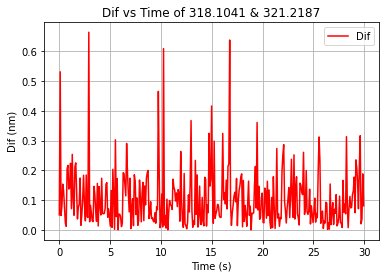

In [199]:
plottime_c6(rdf,316,320)


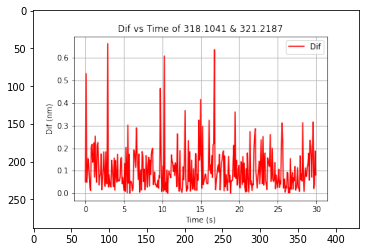

In [200]:
import imageio

# read PNG file
image = imageio.imread('my_plot.png')

# display image
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()


#**CT-1.7** 
Plot the full and some reduced datasets in the same figure. Is there any visual difference? [2.0 points]

In [201]:
df = df.rename(columns={'Unnamed: 0': 'Time','Unnamed: 1': 'ID'})
df['Time'] = pd.to_datetime(df['Time']) 
# set the first time as zero
df['Time'] = (df['Time'] - df['Time'].min()).dt.total_seconds()

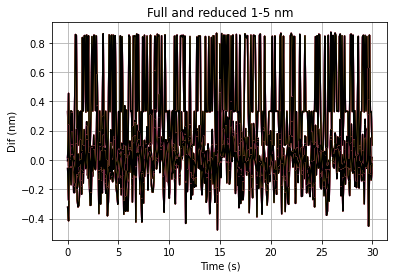

In [221]:
import itertools

for i, j in itertools.product(range(0,5,1), ['b', 'r', 'm', 'y', 'k']):
  plt.plot(df['Time'],reduce_resolution_g(df,i).iloc[:,2],color=j)

plt.xlabel('Time (s)')
plt.ylabel('Dif (nm)')
plt.title('Full and reduced 1-5 nm')
plt.grid()
# show the plot
plt.show()